In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
vehicles = pd.read_csv('./data/vehicles.csv')

In [8]:
vehicles.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [9]:
# Basic info about year column
print("Year Column Analysis")
print("=" * 60)
print(f"Total records: {len(vehicles)}")
print(f"Missing values: {vehicles['year'].isna().sum()}")
print(f"Non-null values: {vehicles['year'].notna().sum()}")
print("\nBasic Statistics:")
print(vehicles['year'].describe())

# Current year for reference (dataset context)
current_year = 2025
print(f"\nCurrent year (for context): {current_year}")


Year Column Analysis
Total records: 426880
Missing values: 1205
Non-null values: 425675

Basic Statistics:
count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

Current year (for context): 2025


In [10]:
# Remove missing values for outlier analysis
year_clean = vehicles['year'].dropna()

print("=" * 60)
print("METHOD 1: Domain Knowledge - Reasonable Year Range")
print("=" * 60)

# Define reasonable bounds for vehicle years
# Oldest production car: ~1900s, but realistically most vehicles are 1950+
# Future years beyond current year are errors
min_reasonable_year = 1900
max_reasonable_year = current_year

# Identify outliers based on domain knowledge
outliers_domain = year_clean[(year_clean < min_reasonable_year) | (year_clean > max_reasonable_year)]

print(f"Reasonable year range: {min_reasonable_year} - {max_reasonable_year}")
print(f"\nNumber of outliers: {len(outliers_domain):,} ({len(outliers_domain)/len(year_clean)*100:.2f}%)")
print(f"  - Before {min_reasonable_year}: {(year_clean < min_reasonable_year).sum():,}")
print(f"  - After {max_reasonable_year}: {(year_clean > max_reasonable_year).sum():,}")

if len(outliers_domain) > 0:
    print(f"\nOutlier values:")
    print(f"  Minimum year: {outliers_domain.min():.0f}")
    print(f"  Maximum year: {outliers_domain.max():.0f}")
    
# More restrictive: typical used car market (last ~50 years + collectibles)
min_typical_year = 1950
outliers_typical = year_clean[year_clean < min_typical_year]
print(f"\nVehicles before {min_typical_year} (antique/collectible): {len(outliers_typical):,} ({len(outliers_typical)/len(year_clean)*100:.2f}%)")


METHOD 1: Domain Knowledge - Reasonable Year Range
Reasonable year range: 1900 - 2025

Number of outliers: 0 (0.00%)
  - Before 1900: 0
  - After 2025: 0

Vehicles before 1950 (antique/collectible): 1,213 (0.28%)


In [11]:
from scipy import stats

print("=" * 60)
print("METHOD 2: IQR (Interquartile Range) Method")
print("=" * 60)

# Calculate IQR
Q1 = year_clean.quantile(0.25)
Q3 = year_clean.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = year_clean[(year_clean < lower_bound) | (year_clean > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.0f}")
print(f"Q3 (75th percentile): {Q3:.0f}")
print(f"IQR: {IQR:.0f} years")
print(f"\nOutlier boundaries:")
print(f"  Lower bound: {lower_bound:.0f}")
print(f"  Upper bound: {upper_bound:.0f}")
print(f"\nNumber of outliers: {len(outliers_iqr):,} ({len(outliers_iqr)/len(year_clean)*100:.2f}%)")
print(f"  - Below {lower_bound:.0f}: {(year_clean < lower_bound).sum():,}")
print(f"  - Above {upper_bound:.0f}: {(year_clean > upper_bound).sum():,}")


METHOD 2: IQR (Interquartile Range) Method
Q1 (25th percentile): 2008
Q3 (75th percentile): 2017
IQR: 9 years

Outlier boundaries:
  Lower bound: 1994
  Upper bound: 2030

Number of outliers: 15,896 (3.73%)
  - Below 1994: 15,896
  - Above 2030: 0


In [12]:
print("=" * 60)
print("METHOD 3: Z-Score Method")
print("=" * 60)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(year_clean))

# Threshold: typically 3 standard deviations
threshold = 3

# Identify outliers
outliers_zscore = year_clean[z_scores > threshold]

print(f"Z-score threshold: {threshold}")
print(f"Number of outliers: {len(outliers_zscore):,} ({len(outliers_zscore)/len(year_clean)*100:.2f}%)")

# Show some statistics about the outliers
if len(outliers_zscore) > 0:
    print(f"\nOutlier statistics:")
    print(f"  Min outlier value: {outliers_zscore.min():.0f}")
    print(f"  Max outlier value: {outliers_zscore.max():.0f}")
    print(f"  Mean of outliers: {outliers_zscore.mean():.0f}")
    
print("\n" + "=" * 60)
print("METHOD 4: Percentile Method")
print("=" * 60)

# Define percentile thresholds
lower_percentile = 1
upper_percentile = 99

lower_threshold = year_clean.quantile(lower_percentile / 100)
upper_threshold = year_clean.quantile(upper_percentile / 100)

# Identify outliers
outliers_percentile = year_clean[(year_clean < lower_threshold) | (year_clean > upper_threshold)]

print(f"Lower threshold ({lower_percentile}th percentile): {lower_threshold:.0f}")
print(f"Upper threshold ({upper_percentile}th percentile): {upper_threshold:.0f}")
print(f"\nNumber of outliers: {len(outliers_percentile):,} ({len(outliers_percentile)/len(year_clean)*100:.2f}%)")
print(f"  - Below {lower_percentile}th percentile: {(year_clean < lower_threshold).sum():,}")
print(f"  - Above {upper_percentile}th percentile: {(year_clean > upper_threshold).sum():,}")


METHOD 3: Z-Score Method
Z-score threshold: 3
Number of outliers: 9,116 (2.14%)

Outlier statistics:
  Min outlier value: 1900
  Max outlier value: 1982
  Mean of outliers: 1964

METHOD 4: Percentile Method
Lower threshold (1th percentile): 1967
Upper threshold (99th percentile): 2020

Number of outliers: 6,620 (1.56%)
  - Below 1th percentile: 4,091
  - Above 99th percentile: 2,529


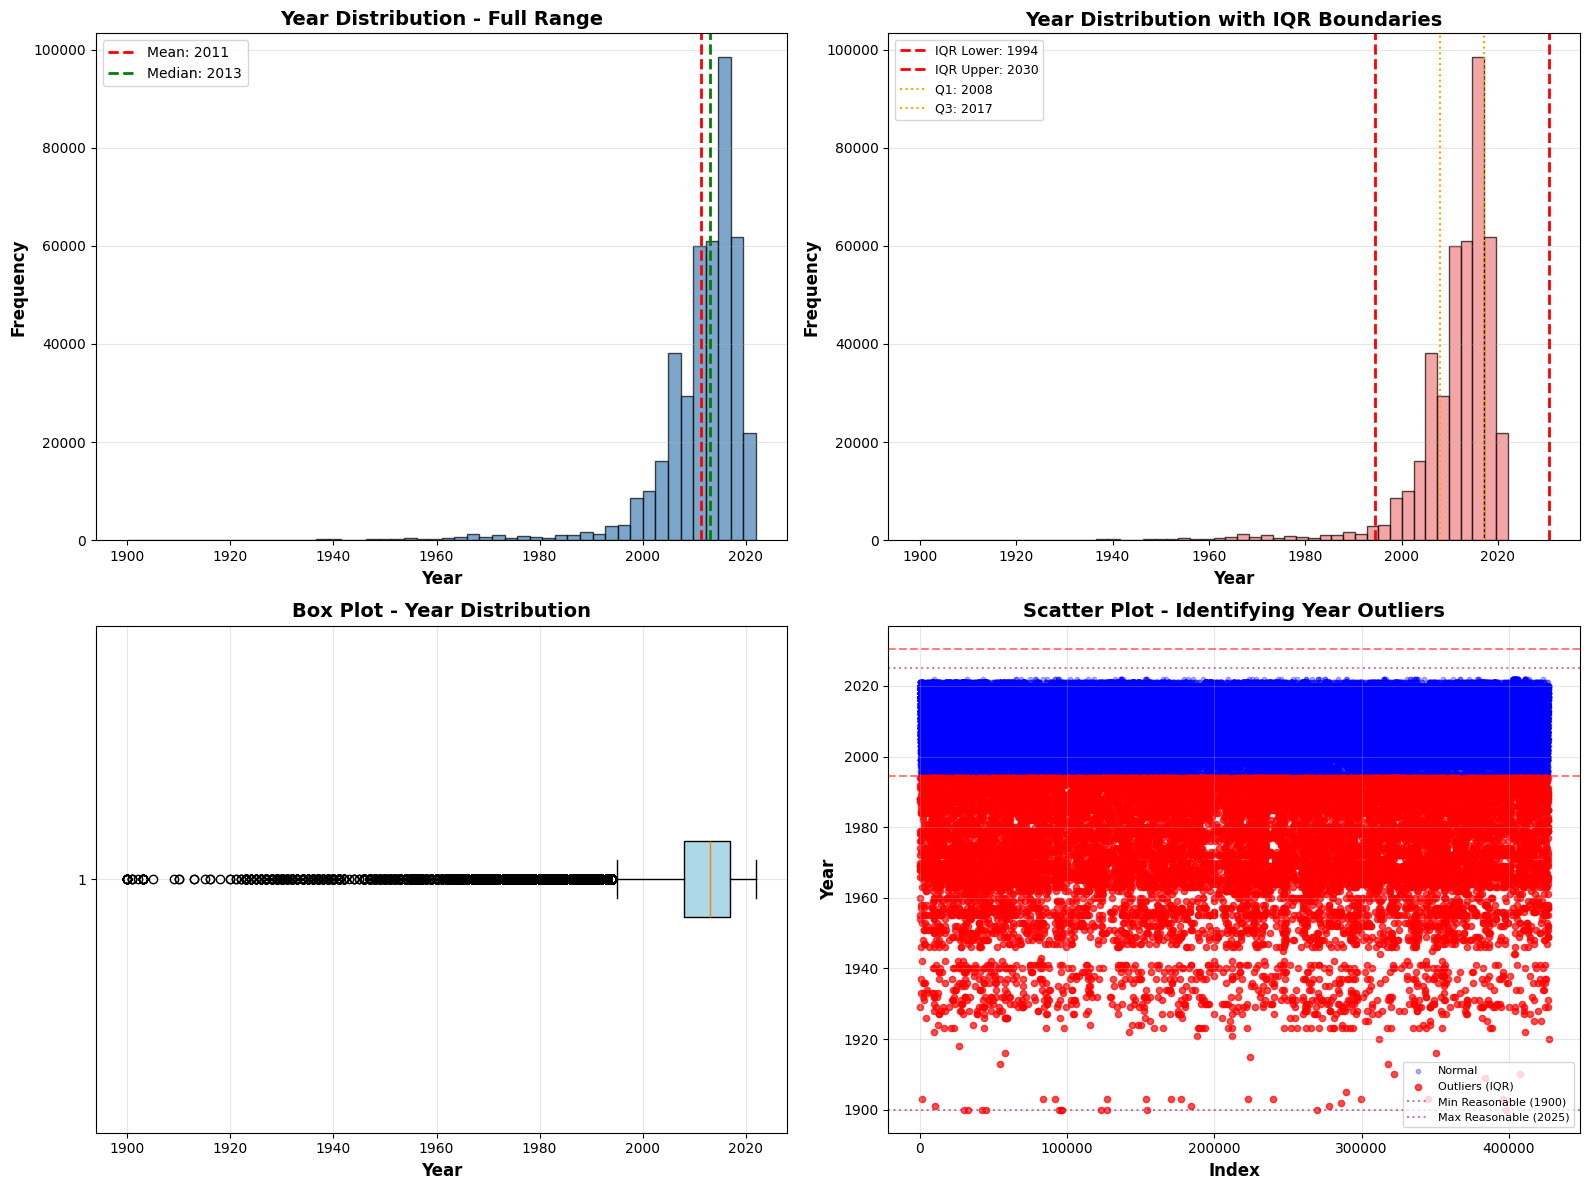

In [13]:
# Visualize year distribution and outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram - Full distribution
ax1 = axes[0, 0]
ax1.hist(year_clean, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(year_clean.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {year_clean.mean():.0f}')
ax1.axvline(year_clean.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {year_clean.median():.0f}')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Year Distribution - Full Range', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Histogram with IQR boundaries
ax2 = axes[0, 1]
ax2.hist(year_clean, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Lower: {lower_bound:.0f}')
ax2.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Upper: {upper_bound:.0f}')
ax2.axvline(Q1, color='orange', linestyle=':', linewidth=1.5, label=f'Q1: {Q1:.0f}')
ax2.axvline(Q3, color='orange', linestyle=':', linewidth=1.5, label=f'Q3: {Q3:.0f}')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Year Distribution with IQR Boundaries', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Box plot
ax3 = axes[1, 0]
box = ax3.boxplot(year_clean, vert=False, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.set_title('Box Plot - Year Distribution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Scatter plot showing outliers
ax4 = axes[1, 1]
is_outlier_iqr = (year_clean < lower_bound) | (year_clean > upper_bound)
normal_values = year_clean[~is_outlier_iqr]
outlier_values = year_clean[is_outlier_iqr]

ax4.scatter(normal_values.index, normal_values, alpha=0.3, s=10, label='Normal', color='blue')
ax4.scatter(outlier_values.index, outlier_values, alpha=0.7, s=20, label='Outliers (IQR)', color='red')
ax4.axhline(lower_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(upper_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(min_reasonable_year, color='purple', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Min Reasonable ({min_reasonable_year})')
ax4.axhline(max_reasonable_year, color='purple', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Max Reasonable ({max_reasonable_year})')
ax4.set_xlabel('Index', fontsize=12, fontweight='bold')
ax4.set_ylabel('Year', fontsize=12, fontweight='bold')
ax4.set_title('Scatter Plot - Identifying Year Outliers', fontsize=14, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [18]:
# Detailed analysis of year values
print("=" * 80)
print("YEAR VALUE COUNTS")
print("=" * 80)

# Show unique years and their frequencies
year_counts = year_clean.value_counts().sort_index()

print(f"\nTotal unique years: {len(year_counts)}")
print(f"Year range: {year_counts.index.min():.0f} to {year_counts.index.max():.0f}")

# Show most common years
print("\nMost Common Years (Top 15):")
print("-" * 80)
top_years = year_clean.value_counts().head(25)
for year, count in top_years.items():
    pct = count / len(year_clean) * 100
    print(f"{year:.0f}: {count:,} vehicles ({pct:.2f}%)")

# Show least common years (potential outliers)
print("\nLeast Common Years (Bottom 15):")
print("-" * 80)
bottom_years = year_clean.value_counts().tail(25)
for year, count in bottom_years.items():
    pct = count / len(year_clean) * 100
    print(f"{year:.0f}: {count:,} vehicles ({pct:.2f}%)")


YEAR VALUE COUNTS

Total unique years: 114
Year range: 1900 to 2022

Most Common Years (Top 15):
--------------------------------------------------------------------------------
2017: 36,420 vehicles (8.56%)
2018: 36,369 vehicles (8.54%)
2015: 31,538 vehicles (7.41%)
2013: 30,794 vehicles (7.23%)
2016: 30,434 vehicles (7.15%)
2014: 30,283 vehicles (7.11%)
2019: 25,375 vehicles (5.96%)
2012: 23,898 vehicles (5.61%)
2011: 20,341 vehicles (4.78%)
2020: 19,298 vehicles (4.53%)
2008: 17,150 vehicles (4.03%)
2010: 15,829 vehicles (3.72%)
2007: 14,873 vehicles (3.49%)
2006: 12,763 vehicles (3.00%)
2009: 12,185 vehicles (2.86%)
2005: 10,622 vehicles (2.50%)
2004: 8,971 vehicles (2.11%)
2003: 7,151 vehicles (1.68%)
2002: 5,587 vehicles (1.31%)
2001: 4,443 vehicles (1.04%)
2000: 3,572 vehicles (0.84%)
1999: 3,094 vehicles (0.73%)
2021: 2,396 vehicles (0.56%)
1998: 1,988 vehicles (0.47%)
1997: 1,724 vehicles (0.41%)

Least Common Years (Bottom 15):
------------------------------------------------

In [15]:
# Show detailed outlier records with vehicle information (using IQR method)
print("=" * 80)
print("DETAILED YEAR OUTLIER RECORDS (Using IQR Method)")
print("=" * 80)

# Get outlier indices
outlier_indices = outliers_iqr.index

# Create a dataframe with outlier records and relevant columns
outlier_df = vehicles.loc[outlier_indices, ['year', 'manufacturer', 'model', 'odometer', 'price']].copy()
outlier_df['outlier_type'] = outlier_df['year'].apply(
    lambda x: 'OLD' if x < lower_bound else 'NEW/FUTURE'
)

# Sort by year
outlier_df_sorted = outlier_df.sort_values('year')

print(f"\nTotal outliers found: {len(outlier_df):,}\n")

# Show oldest vehicles (outliers)
print("OLDEST VEHICLES (Bottom 10 years):")
print("-" * 80)
print(outlier_df_sorted.head(10).to_string(index=False))

print("\n\nNEWEST/FUTURE VEHICLES (Top 10 years):")
print("-" * 80)
print(outlier_df_sorted.tail(10).to_string(index=False))

# Additional statistics
print("\n" + "=" * 80)
print("OUTLIER STATISTICS BY TYPE")
print("=" * 80)

old_outliers = outlier_df[outlier_df['outlier_type'] == 'OLD']
new_outliers = outlier_df[outlier_df['outlier_type'] == 'NEW/FUTURE']

print(f"\nOLD outliers (before {lower_bound:.0f}):")
print(f"  Count: {len(old_outliers):,}")
if len(old_outliers) > 0:
    print(f"  Min year: {old_outliers['year'].min():.0f}")
    print(f"  Max year: {old_outliers['year'].max():.0f}")
    print(f"  Mean year: {old_outliers['year'].mean():.0f}")

print(f"\nNEW/FUTURE outliers (after {upper_bound:.0f}):")
print(f"  Count: {len(new_outliers):,}")
if len(new_outliers) > 0:
    print(f"  Min year: {new_outliers['year'].min():.0f}")
    print(f"  Max year: {new_outliers['year'].max():.0f}")
    print(f"  Mean year: {new_outliers['year'].mean():.0f}")
    
print("=" * 80)


DETAILED YEAR OUTLIER RECORDS (Using IQR Method)

Total outliers found: 15,896

OLDEST VEHICLES (Bottom 10 years):
--------------------------------------------------------------------------------
  year manufacturer             model  odometer  price outlier_type
1900.0        dodge           rampage  999999.0    500          OLD
1900.0        acura               rdx    4500.0  38250          OLD
1900.0          NaN cushman white van    2136.0   4500          OLD
1900.0         ford       power wagon    2300.0      1          OLD
1900.0          NaN               any  123456.0    998          OLD
1900.0          NaN               All  100000.0      1          OLD
1900.0          NaN       any and all   10000.0     75          OLD
1900.0          NaN               All    1000.0      1          OLD
1900.0         ford       power wagon    2300.0      1          OLD
1900.0         ford       power wagon    2300.0      1          OLD


NEWEST/FUTURE VEHICLES (Top 10 years):
---------------

In [16]:
# Summary comparison of all methods
print("=" * 80)
print("COMPARISON OF OUTLIER DETECTION METHODS")
print("=" * 80)

methods_summary = pd.DataFrame({
    'Method': [
        'Domain Knowledge (< 1900 or > 2025)', 
        'IQR (1.5 * IQR)', 
        'Z-Score (±3σ)', 
        f'Percentile (1-{upper_percentile}%)'
    ],
    'Outliers Found': [
        len(outliers_domain), 
        len(outliers_iqr), 
        len(outliers_zscore), 
        len(outliers_percentile)
    ],
    'Percentage': [
        f"{len(outliers_domain)/len(year_clean)*100:.2f}%",
        f"{len(outliers_iqr)/len(year_clean)*100:.2f}%",
        f"{len(outliers_zscore)/len(year_clean)*100:.2f}%",
        f"{len(outliers_percentile)/len(year_clean)*100:.2f}%"
    ]
})

print("\n", methods_summary.to_string(index=False))

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR YEAR OUTLIERS")
print("=" * 80)
print("""
1. Domain Knowledge Method (RECOMMENDED for year data):
   - Use business/domain rules: vehicles between 1900-2025
   - Most practical for year since we know the valid range
   - Catches data entry errors (e.g., 2099, 1899)
   - Preserves antique/collectible vehicles (1900-1950s)
   
2. IQR Method:
   - Good for identifying statistically unusual years
   - May flag legitimate antique vehicles as outliers
   - Useful for identifying older vehicles that might need special handling
   
3. Z-Score Method:
   - Less suitable for year data (not normally distributed)
   - More conservative, catches only extreme cases
   
4. Percentile Method:
   - Good for identifying the oldest/newest segments
   - Helps understand the age distribution of inventory

For year data, consider:
   - Future years (> current year): Likely data errors - FIX/REMOVE
   - Very old years (< 1900): Likely data errors - INVESTIGATE
   - Antique vehicles (1900-1960): Valid but may need special category
   - Most inventory should be in 1990-2025 range for typical used car market
   
Recommended actions:
   1. Fix/remove years > {current_year} (definitely errors)
   2. Investigate years < 1900 (likely errors)
   3. Flag years 1900-1960 as "antique/collectible" (separate category)
   4. Focus primary analysis on 1960-{current_year} for typical market
""")
print("=" * 80)


COMPARISON OF OUTLIER DETECTION METHODS

                              Method  Outliers Found Percentage
Domain Knowledge (< 1900 or > 2025)               0      0.00%
                    IQR (1.5 * IQR)           15896      3.73%
                      Z-Score (±3σ)            9116      2.14%
                 Percentile (1-99%)            6620      1.56%

RECOMMENDATIONS FOR YEAR OUTLIERS

1. Domain Knowledge Method (RECOMMENDED for year data):
   - Use business/domain rules: vehicles between 1900-2025
   - Most practical for year since we know the valid range
   - Catches data entry errors (e.g., 2099, 1899)
   - Preserves antique/collectible vehicles (1900-1950s)

2. IQR Method:
   - Good for identifying statistically unusual years
   - May flag legitimate antique vehicles as outliers
   - Useful for identifying older vehicles that might need special handling

3. Z-Score Method:
   - Less suitable for year data (not normally distributed)
   - More conservative, catches only extreme c

In [17]:
# Data cleaning options for year outliers
print("=" * 80)
print("DATA CLEANING OPTIONS")
print("=" * 80)

# OPTION 1: Filter to reasonable year range
vehicles_filtered = vehicles[
    (vehicles['year'] >= min_reasonable_year) & 
    (vehicles['year'] <= max_reasonable_year)
].copy()

print(f"\nOption 1: Filter to {min_reasonable_year}-{max_reasonable_year}")
print(f"  Original size: {len(vehicles):,}")
print(f"  Filtered size: {len(vehicles_filtered):,}")
print(f"  Removed: {len(vehicles) - len(vehicles_filtered):,} records")

# OPTION 2: Filter to typical used car market (1960-current)
min_typical = 1960
vehicles_typical = vehicles[
    (vehicles['year'] >= min_typical) & 
    (vehicles['year'] <= max_reasonable_year)
].copy()

print(f"\nOption 2: Filter to typical market ({min_typical}-{max_reasonable_year})")
print(f"  Original size: {len(vehicles):,}")
print(f"  Filtered size: {len(vehicles_typical):,}")
print(f"  Removed: {len(vehicles) - len(vehicles_typical):,} records")

# OPTION 3: Create categories for different year ranges
def categorize_year(year):
    if pd.isna(year):
        return 'Missing'
    elif year < 1900:
        return 'Invalid (Too Old)'
    elif year > current_year:
        return 'Invalid (Future)'
    elif year < 1960:
        return 'Antique/Collectible'
    elif year < 1990:
        return 'Classic'
    elif year < 2010:
        return 'Older Used'
    elif year < 2020:
        return 'Recent Used'
    else:
        return 'Nearly New'

vehicles_categorized = vehicles.copy()
vehicles_categorized['year_category'] = vehicles_categorized['year'].apply(categorize_year)

print(f"\nOption 3: Categorize by year range")
print("\nYear category distribution:")
print(vehicles_categorized['year_category'].value_counts().to_string())

# OPTION 4: Flag outliers for review
vehicles_flagged = vehicles.copy()
vehicles_flagged['year_outlier_iqr'] = vehicles_flagged.index.isin(outliers_iqr.index)
vehicles_flagged['year_invalid'] = (
    (vehicles_flagged['year'] < min_reasonable_year) | 
    (vehicles_flagged['year'] > max_reasonable_year)
)

print(f"\nOption 4: Flag outliers")
print(f"  IQR outliers flagged: {vehicles_flagged['year_outlier_iqr'].sum():,}")
print(f"  Invalid years flagged: {vehicles_flagged['year_invalid'].sum():,}")

print("\n" + "=" * 80)
print("RECOMMENDATION: Use vehicles_filtered or vehicles_typical for modeling")
print("=" * 80)


DATA CLEANING OPTIONS

Option 1: Filter to 1900-2025
  Original size: 426,880
  Filtered size: 425,675
  Removed: 1,205 records

Option 2: Filter to typical market (1960-2025)
  Original size: 426,880
  Filtered size: 423,217
  Removed: 3,663 records

Option 3: Categorize by year range

Year category distribution:
year_category
Recent Used            281281
Older Used             110184
Nearly New              21827
Classic                  9925
Antique/Collectible      2458
Missing                  1205

Option 4: Flag outliers
  IQR outliers flagged: 15,896
  Invalid years flagged: 0

RECOMMENDATION: Use vehicles_filtered or vehicles_typical for modeling


In [30]:
vehicles = pd.read_csv('./data/vehicles.csv')

In [23]:

year_clean = vehicles[(vehicles['year'] >= 2000) & (vehicles['year'] <= 2026)]


In [28]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [31]:
# Remove missing values for outlier analysis
year_clean = vehicles['year'].dropna()

print("=" * 60)
print("METHOD 1: Domain Knowledge - Reasonable Year Range")
print("=" * 60)

# Define reasonable bounds for vehicle years
# Oldest production car: ~1900s, but realistically most vehicles are 1950+
# Future years beyond current year are errors
min_reasonable_year = 2000
max_reasonable_year = current_year

# Identify outliers based on domain knowledge
outliers_domain = year_clean[(year_clean < min_reasonable_year) | (year_clean > max_reasonable_year)]

print(f"Reasonable year range: {min_reasonable_year} - {max_reasonable_year}")
print(f"\nNumber of outliers: {len(outliers_domain):,} ({len(outliers_domain)/len(year_clean)*100:.2f}%)")
print(f"  - Before {min_reasonable_year}: {(year_clean < min_reasonable_year).sum():,}")
print(f"  - After {max_reasonable_year}: {(year_clean > max_reasonable_year).sum():,}")

if len(outliers_domain) > 0:
    print(f"\nOutlier values:")
    print(f"  Minimum year: {outliers_domain.min():.0f}")
    print(f"  Maximum year: {outliers_domain.max():.0f}")
    
# More restrictive: typical used car market (last ~50 years + collectibles)
min_typical_year = 2000
outliers_typical = year_clean[year_clean < min_typical_year]
print(f"\nVehicles before {min_typical_year} (antique/collectible): {len(outliers_typical):,} ({len(outliers_typical)/len(year_clean)*100:.2f}%)")


METHOD 1: Domain Knowledge - Reasonable Year Range
Reasonable year range: 2000 - 2025

Number of outliers: 25,250 (5.93%)
  - Before 2000: 25,250
  - After 2025: 0

Outlier values:
  Minimum year: 1900
  Maximum year: 1999

Vehicles before 2000 (antique/collectible): 25,250 (5.93%)


In [32]:
from scipy import stats

print("=" * 60)
print("METHOD 2: IQR (Interquartile Range) Method")
print("=" * 60)

# Calculate IQR
Q1 = year_clean.quantile(0.25)
Q3 = year_clean.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = year_clean[(year_clean < lower_bound) | (year_clean > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.0f}")
print(f"Q3 (75th percentile): {Q3:.0f}")
print(f"IQR: {IQR:.0f} years")
print(f"\nOutlier boundaries:")
print(f"  Lower bound: {lower_bound:.0f}")
print(f"  Upper bound: {upper_bound:.0f}")
print(f"\nNumber of outliers: {len(outliers_iqr):,} ({len(outliers_iqr)/len(year_clean)*100:.2f}%)")
print(f"  - Below {lower_bound:.0f}: {(year_clean < lower_bound).sum():,}")
print(f"  - Above {upper_bound:.0f}: {(year_clean > upper_bound).sum():,}")


METHOD 2: IQR (Interquartile Range) Method
Q1 (25th percentile): 2008
Q3 (75th percentile): 2017
IQR: 9 years

Outlier boundaries:
  Lower bound: 1994
  Upper bound: 2030

Number of outliers: 15,896 (3.73%)
  - Below 1994: 15,896
  - Above 2030: 0


In [33]:
print("=" * 60)
print("METHOD 3: Z-Score Method")
print("=" * 60)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(year_clean))

# Threshold: typically 3 standard deviations
threshold = 3

# Identify outliers
outliers_zscore = year_clean[z_scores > threshold]

print(f"Z-score threshold: {threshold}")
print(f"Number of outliers: {len(outliers_zscore):,} ({len(outliers_zscore)/len(year_clean)*100:.2f}%)")

# Show some statistics about the outliers
if len(outliers_zscore) > 0:
    print(f"\nOutlier statistics:")
    print(f"  Min outlier value: {outliers_zscore.min():.0f}")
    print(f"  Max outlier value: {outliers_zscore.max():.0f}")
    print(f"  Mean of outliers: {outliers_zscore.mean():.0f}")
    
print("\n" + "=" * 60)
print("METHOD 4: Percentile Method")
print("=" * 60)

# Define percentile thresholds
lower_percentile = 1
upper_percentile = 99

lower_threshold = year_clean.quantile(lower_percentile / 100)
upper_threshold = year_clean.quantile(upper_percentile / 100)

# Identify outliers
outliers_percentile = year_clean[(year_clean < lower_threshold) | (year_clean > upper_threshold)]

print(f"Lower threshold ({lower_percentile}th percentile): {lower_threshold:.0f}")
print(f"Upper threshold ({upper_percentile}th percentile): {upper_threshold:.0f}")
print(f"\nNumber of outliers: {len(outliers_percentile):,} ({len(outliers_percentile)/len(year_clean)*100:.2f}%)")
print(f"  - Below {lower_percentile}th percentile: {(year_clean < lower_threshold).sum():,}")
print(f"  - Above {upper_percentile}th percentile: {(year_clean > upper_threshold).sum():,}")


METHOD 3: Z-Score Method
Z-score threshold: 3
Number of outliers: 9,116 (2.14%)

Outlier statistics:
  Min outlier value: 1900
  Max outlier value: 1982
  Mean of outliers: 1964

METHOD 4: Percentile Method
Lower threshold (1th percentile): 1967
Upper threshold (99th percentile): 2020

Number of outliers: 6,620 (1.56%)
  - Below 1th percentile: 4,091
  - Above 99th percentile: 2,529


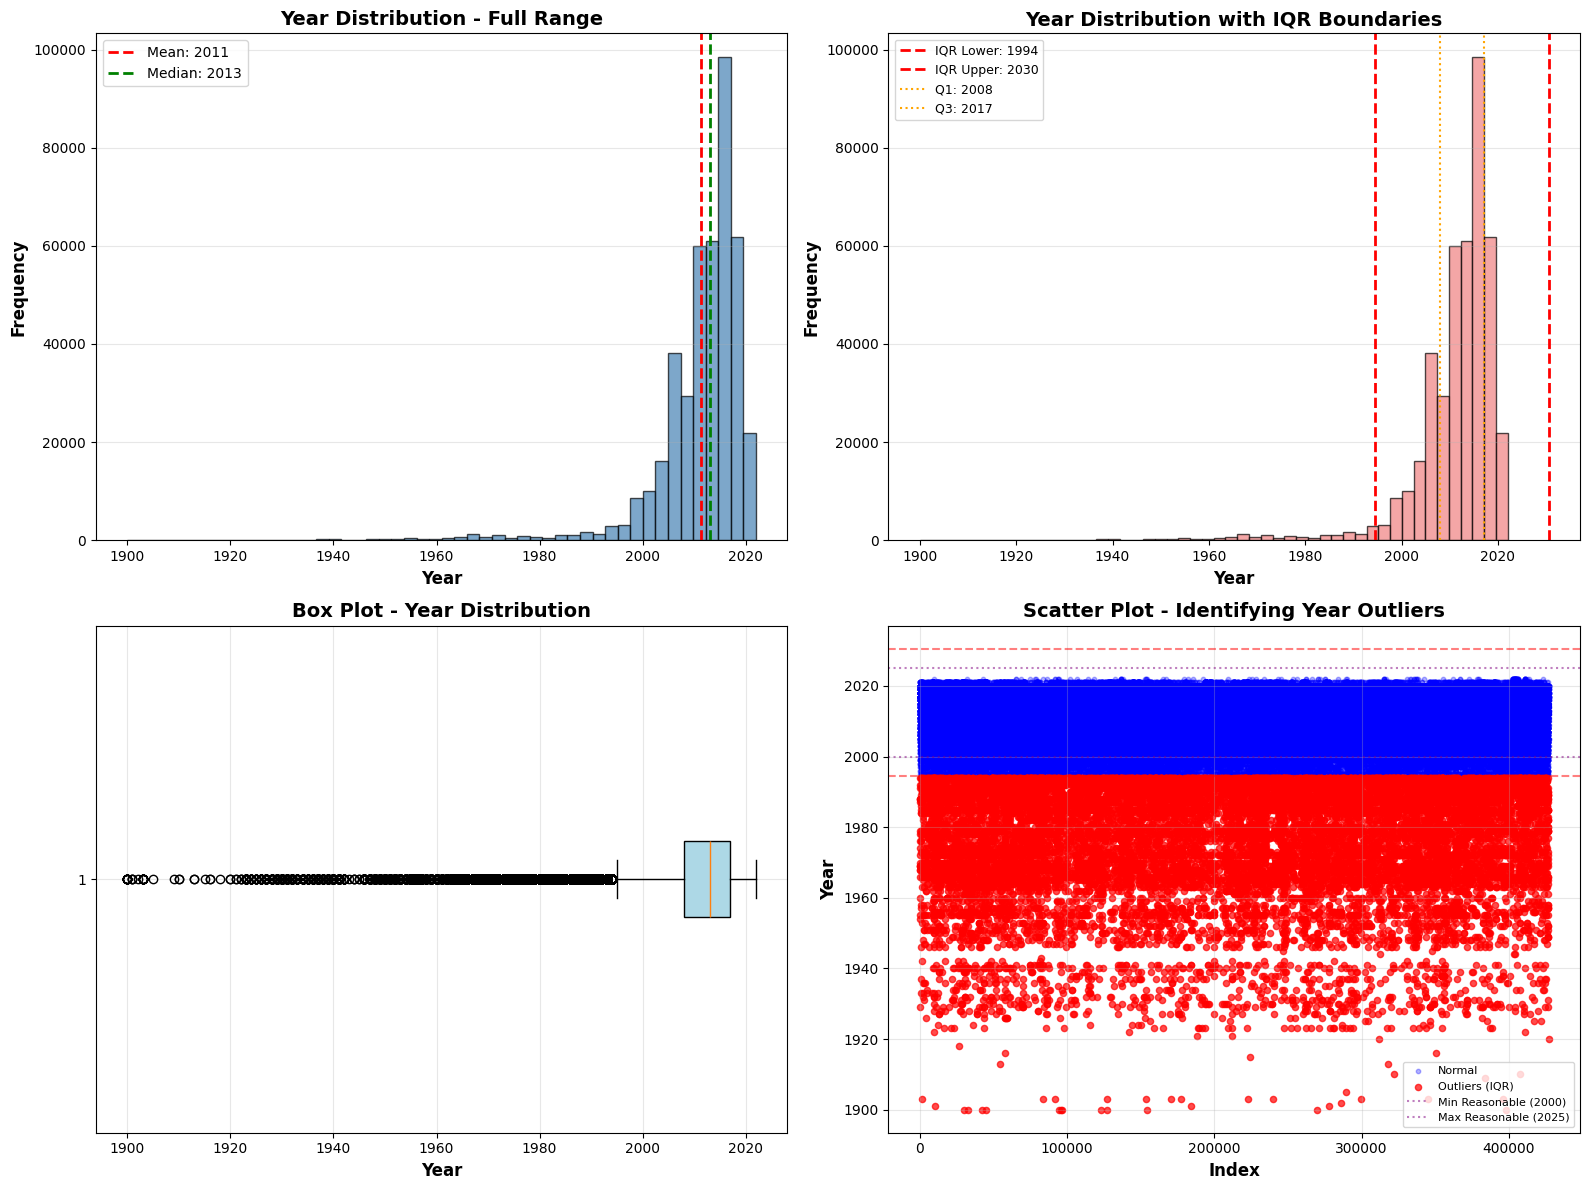

In [34]:
# Visualize year distribution and outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram - Full distribution
ax1 = axes[0, 0]
ax1.hist(year_clean, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(year_clean.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {year_clean.mean():.0f}')
ax1.axvline(year_clean.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {year_clean.median():.0f}')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Year Distribution - Full Range', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Histogram with IQR boundaries
ax2 = axes[0, 1]
ax2.hist(year_clean, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Lower: {lower_bound:.0f}')
ax2.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Upper: {upper_bound:.0f}')
ax2.axvline(Q1, color='orange', linestyle=':', linewidth=1.5, label=f'Q1: {Q1:.0f}')
ax2.axvline(Q3, color='orange', linestyle=':', linewidth=1.5, label=f'Q3: {Q3:.0f}')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Year Distribution with IQR Boundaries', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Box plot
ax3 = axes[1, 0]
box = ax3.boxplot(year_clean, vert=False, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.set_title('Box Plot - Year Distribution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Scatter plot showing outliers
ax4 = axes[1, 1]
is_outlier_iqr = (year_clean < lower_bound) | (year_clean > upper_bound)
normal_values = year_clean[~is_outlier_iqr]
outlier_values = year_clean[is_outlier_iqr]

ax4.scatter(normal_values.index, normal_values, alpha=0.3, s=10, label='Normal', color='blue')
ax4.scatter(outlier_values.index, outlier_values, alpha=0.7, s=20, label='Outliers (IQR)', color='red')
ax4.axhline(lower_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(upper_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(min_reasonable_year, color='purple', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Min Reasonable ({min_reasonable_year})')
ax4.axhline(max_reasonable_year, color='purple', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Max Reasonable ({max_reasonable_year})')
ax4.set_xlabel('Index', fontsize=12, fontweight='bold')
ax4.set_ylabel('Year', fontsize=12, fontweight='bold')
ax4.set_title('Scatter Plot - Identifying Year Outliers', fontsize=14, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [35]:

vehicles = pd.read_csv('./data/vehicles.csv')

In [36]:
year_sort = vehicles[(vehicles['year'] >= 2000) & (vehicles['year'] <= 2026)]

IQR Lower Bound: 1994
IQR Upper Bound: 2030
Number of IQR outliers: 15896
Number of cars 2000–2026: 400425


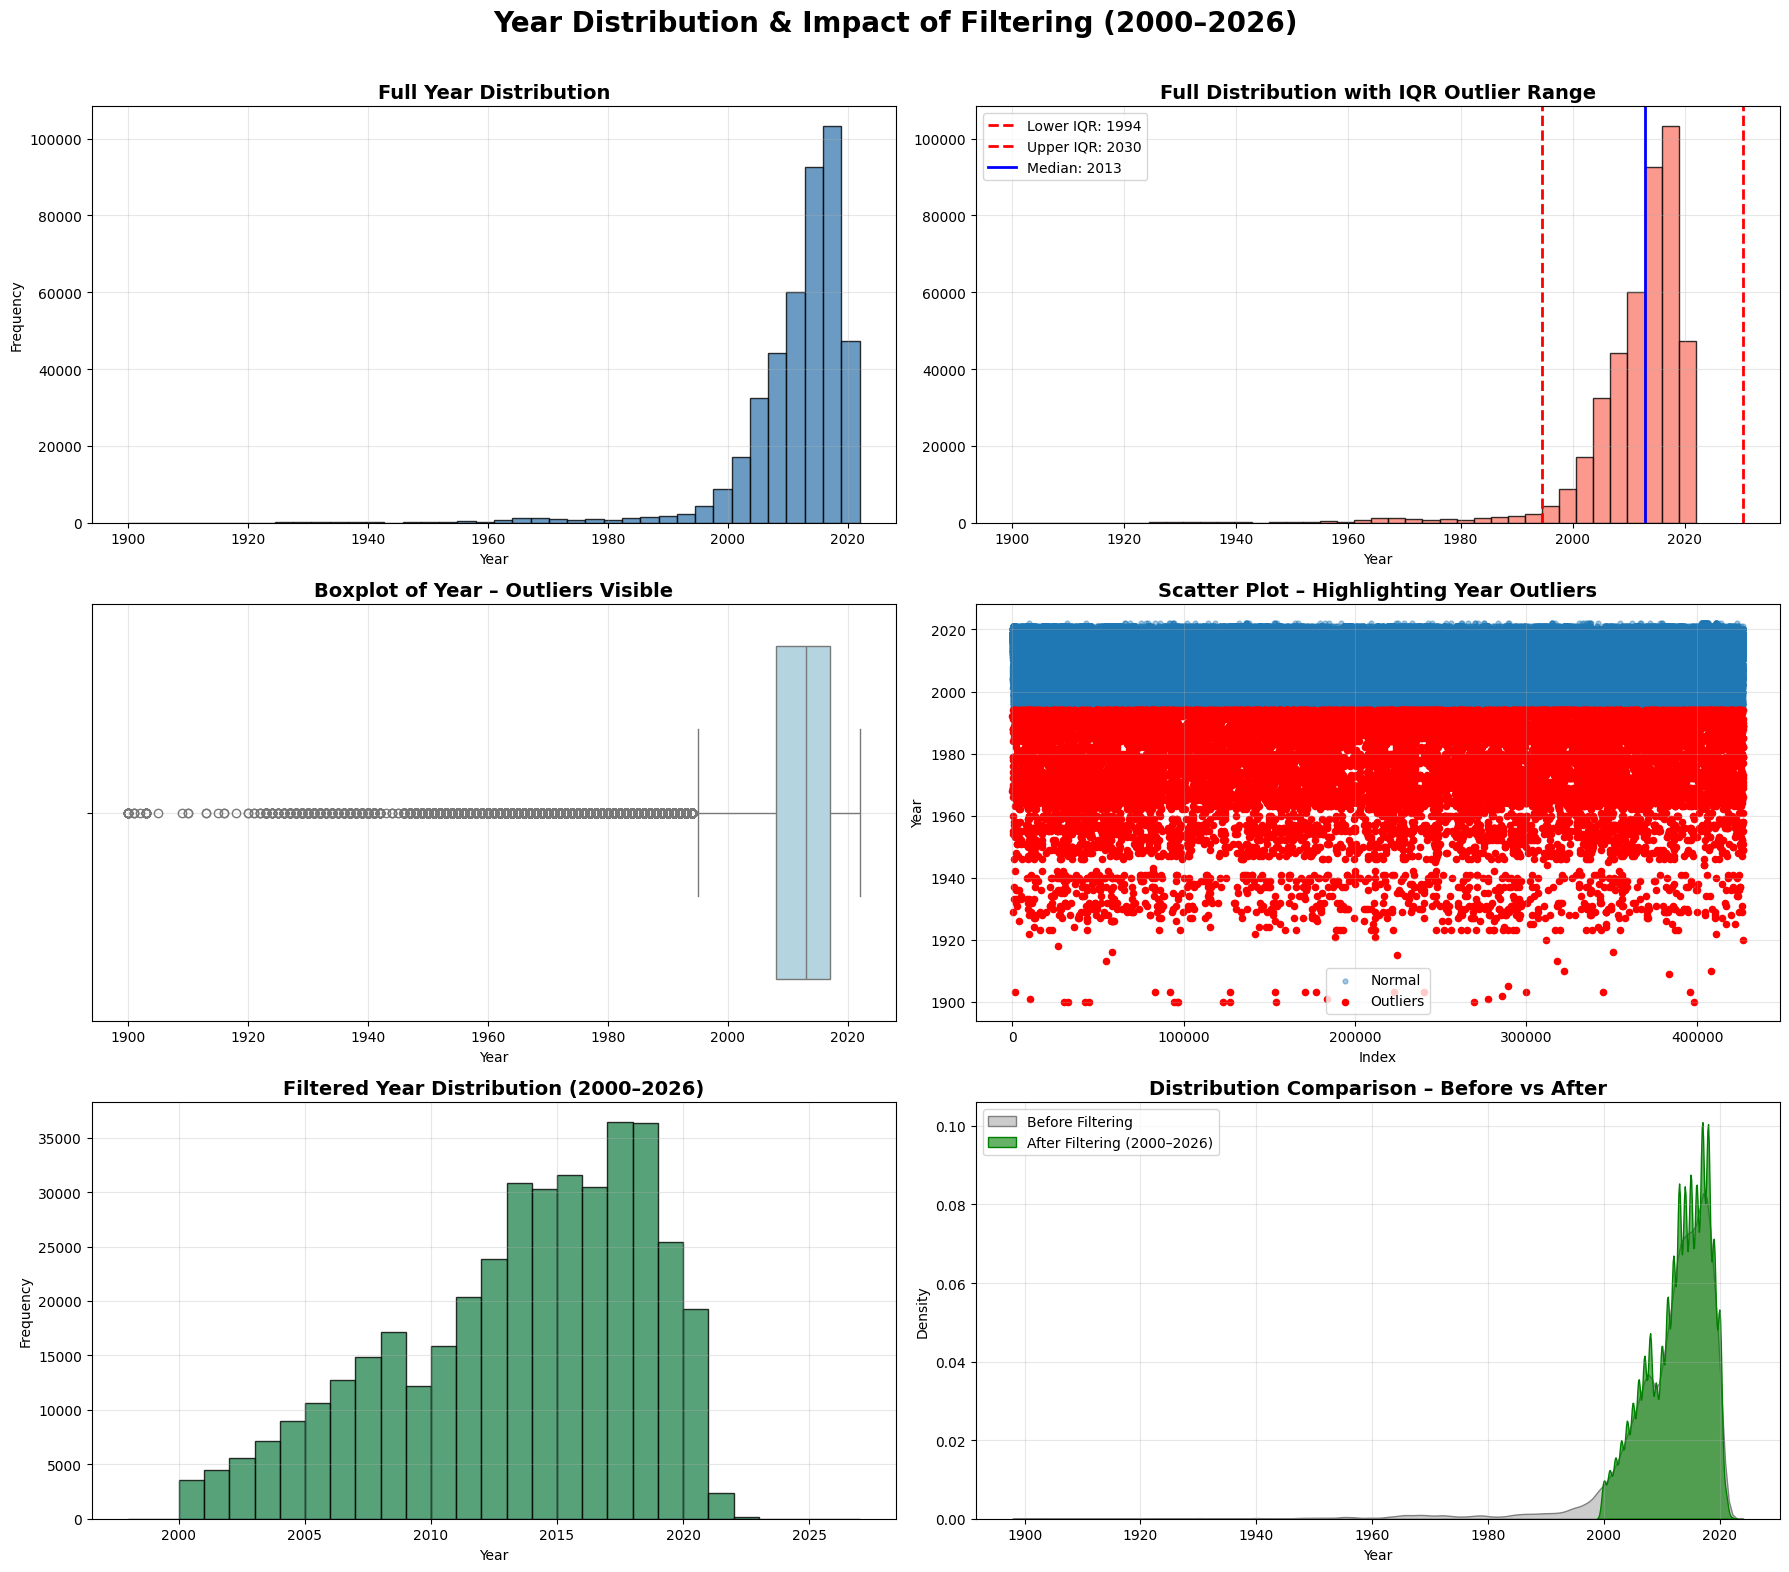

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ------------------------------
# PREP: Extract and clean year
# ------------------------------
year_series = vehicles['year'].dropna().astype(int)
year_sorted = year_series.sort_values()

# Filter range
min_keep_year = 2000
max_keep_year = 2026

filtered_years = year_series[
    (year_series >= min_keep_year) & 
    (year_series <= max_keep_year)
]

# ------------------------------
# IQR Outlier Calculation
# ------------------------------
Q1 = year_sorted.quantile(0.25)
Q3 = year_sorted.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = year_sorted[(year_sorted < lower_bound) | (year_sorted > upper_bound)]

print("IQR Lower Bound:", round(lower_bound))
print("IQR Upper Bound:", round(upper_bound))
print("Number of IQR outliers:", len(outliers_iqr))
print("Number of cars 2000–2026:", len(filtered_years))


# ------------------------------
# FIGURE LAYOUT
# ------------------------------
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
plt.suptitle("Year Distribution & Impact of Filtering (2000–2026)", fontsize=20, fontweight='bold')

# -------------------------------------------------
# (1) Histogram – Full Distribution
# -------------------------------------------------
ax = axes[0, 0]
ax.hist(year_sorted, bins=40, color='steelblue', alpha=0.8, edgecolor='black')
ax.set_title("Full Year Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.grid(alpha=0.3)

# -------------------------------------------------
# (2) Histogram – With IQR Boundaries
# -------------------------------------------------
ax = axes[0, 1]
ax.hist(year_sorted, bins=40, color='salmon', alpha=0.8, edgecolor='black')
ax.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f"Lower IQR: {lower_bound:.0f}")
ax.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f"Upper IQR: {upper_bound:.0f}")
ax.axvline(year_sorted.median(), color='blue', linestyle='-', linewidth=2, label=f"Median: {year_sorted.median():.0f}")
ax.set_title("Full Distribution with IQR Outlier Range", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.legend()
ax.grid(alpha=0.3)

# -------------------------------------------------
# (3) Boxplot – Detect Outliers Clearly
# -------------------------------------------------
ax = axes[1, 0]
sns.boxplot(x=year_sorted, ax=ax, color='lightblue')
ax.set_title("Boxplot of Year – Outliers Visible", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.grid(alpha=0.3)

# -------------------------------------------------
# (4) Scatter – Outlier Identification
# -------------------------------------------------
ax = axes[1, 1]
is_outlier = (year_sorted < lower_bound) | (year_sorted > upper_bound)
ax.scatter(year_sorted.index, year_sorted, s=12, alpha=0.4, label='Normal')
ax.scatter(year_sorted[is_outlier].index, year_sorted[is_outlier], color='red', s=20, label="Outliers")
ax.set_title("Scatter Plot – Highlighting Year Outliers", fontsize=14, fontweight='bold')
ax.set_xlabel("Index")
ax.set_ylabel("Year")
ax.legend()
ax.grid(alpha=0.3)

# -------------------------------------------------
# (5) Histogram – Filtered Distribution (2000–2026)
# -------------------------------------------------
ax = axes[2, 0]
ax.hist(filtered_years, bins=np.arange(1998, 2028, 1), color='seagreen', alpha=0.8, edgecolor='black')
ax.set_title("Filtered Year Distribution (2000–2026)", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.grid(alpha=0.3)

# -------------------------------------------------
# (6) Before vs After – Side-by-Side KDE Comparison
# -------------------------------------------------
ax = axes[2, 1]
sns.kdeplot(year_sorted, label='Before Filtering', fill=True, color='gray', alpha=0.4, ax=ax)
sns.kdeplot(filtered_years, label='After Filtering (2000–2026)', fill=True, color='green', alpha=0.6, ax=ax)
ax.set_title("Distribution Comparison – Before vs After", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Density")
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()